# Edgeworth Box: Efficiency in production allocation

## Efficiency in production

Consider a small-open economy with two production sectors -- agriculture and manufacturing -- with production in each sector taking place with constant returns to scale production functions.  Producers in the agricultural sector maximize profits

$$\max_{K_A,L_A} p_A F(K_A,L_A) - w L_A - r K_A$$

And producers in manufacturing similarly maximize

$$\max_{K_M,L_M} p_M F(K_M,L_M) - w L_M - r K_M$$

In equilibrium total factor demands will equal total supplies:

$$K_A + K_M = \bar K$$

$$L_A + L_M = \bar L$$ 

The first order necessary conditions for an interior optimum in each sector lead to an equilibrium where the following condition must hold:

$$\frac{F_L(K_A,L_A)}{F_K(K_A,L_A)} = \frac{w}{r} 
       =\frac{G_L(\bar K-K_A,\bar L- L_A)}{F_K(\bar K-K_A,\bar L- L_A)} $$

This states that at an efficient allocation of resources the marginal rate of technical substitutions (MRTS) must be the same across the two sectors. In other words at an efficient allocation isoquants from each sector must be tangent to each other in an Edgeworth box.  

If we assume simple Cobb-Douglas forms

$$F(K,L) = K^\alpha L^{1-\alpha}$$
$$G(K,L) = K^\beta L^{1-\beta}$$

we can use the above efficiency condition to obtain a closed form solution for $K_A$ in terms of $L_A$:

$$\frac{(1-\alpha)}{\alpha}\frac{K_A}{L_A} =\frac{w}{r} =\frac{(1-\beta)}{\beta}\frac{\bar K-K_A}{\bar L-L_A}$$

As is well understood, profit maximizing firms would be driven to efficiency in allocation in a competitive market equilibrium without externalities or other market failures. Rearranging the expression above we can get a closed-form expression for the efficiency locus $K_A (L_A)$:

$$K_A(L_A) = \frac{L_A \cdot \bar K}
{ \frac{\beta(1-\alpha)}{\alpha (1-\beta)} (\bar L -L_A)+L_A}$$

This tells us that if we allocate $L_A$ units of labor to the agricultural sector then the efficient thing to then do is allocate $K_A(L_A)$ units of capital to agriculture, and the remaining units of labor and capital to the manufacturing sector. 

## Edgeworth Box plots

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, fixed

In [2]:
ALPHA = 0.3   # capital share in agriculture
BETA = 0.7   # 

KBAR = 100
LBAR = 100

p = 1      # =Pa/Pm  relative price of ag goods

def F(K,L,alpha=ALPHA):
    """Agriculture Production function"""
    return (K**alpha)*(L**(1-alpha))

def G(K,L,beta=BETA):
    """Manufacturing Production function"""
    return (K**beta)*(L**(1-beta))

def budgetc(c1, p1, p2, I):
    return (I/p2)-(p1/p2)*c1

def isoq(L, Q, mu):
    return (Q/(L**(1-mu)))**(1/mu)

In [3]:
def edgeworth(L, Kbar=KBAR, Lbar=LBAR,alpha=ALPHA, beta=BETA):
    """efficiency locus: """
    a = (1-alpha)/alpha
    b = (1-beta)/beta
    return b*L*Kbar/(a*(Lbar-L)+b*L)

In [4]:
def edgeplot(LA, Kbar=KBAR, Lbar=LBAR,alpha=ALPHA,beta=BETA):
    """Draw an edgeworth box
    
    arguments:
    LA -- labor allocated to ag, from which calculate QA(Ka(La),La) 
    """
    KA = edgeworth(LA, Kbar, Lbar,alpha, beta)
    RTS = (alpha/(1-alpha))*(KA/LA)
    QA = F(KA,LA,alpha)
    QM = G(Kbar-KA,Lbar-LA,beta)
    print("(LA,KA)=({:4.1f}, {:4.1f})  (QA, QM)=({:4.1f}, {:4.1f})  RTS={:4.1f}"
          .format(LA,KA,QA,QM,RTS))
    La = np.arange(1,Lbar)
    fig, ax = plt.subplots(figsize=(7,6))
    ax.set_xlim(0, Lbar)
    ax.set_ylim(0, Kbar)
    ax.plot(La, edgeworth(La,Kbar,Lbar,alpha,beta),'k-')
    #ax.plot(La, La,'k--')
    ax.plot(La, isoq(La, QA, alpha))
    ax.plot(La, Kbar-isoq(Lbar-La, QM, beta),'g-')
    ax.plot(LA, KA,'ob')
    ax.vlines(LA,0,KA, linestyles="dashed")
    ax.hlines(KA,0,LA, linestyles="dashed")
    ax.text(-6,-6,r'$O_A$',fontsize=16)
    ax.text(Lbar,Kbar,r'$O_M$',fontsize=16)
    ax.set_xlabel(r'$L_A -- Labor$', fontsize=16)
    ax.set_ylabel('$K_A - Capital$', fontsize=16)
    plt.show()

In [5]:
def ppf(LA,Kbar=KBAR, Lbar=LBAR,alpha=ALPHA,beta=BETA):
    """Draw a production possibility frontier
    
    arguments:
    LA -- labor allocated to ag, from which calculate QA(Ka(La),La) 
    """
    KA = edgeworth(LA, Kbar, Lbar,alpha, beta)
    RTS = (alpha/(1-alpha))*(KA/LA)
    QA = F(KA,LA,alpha)
    QM = G(Kbar-KA,Lbar-LA,beta)
    La = np.arange(1,Lbar)
    Ka = edgeworth(La, Kbar, Lbar,alpha, beta)
    Qa = F(Ka,La,alpha)
    Qm = G(Kbar-Ka,Lbar-La,beta)
    ax.set_xlim(0, Lbar)
    ax.set_ylim(0, Kbar)
    ax.plot(Qa, Qm,'k-')
    plt.show()

It's interesting to note that for Cobb-Douglas technologies you really need quite a difference in capital-intensities between the two technologies in order to get much curvature to the production function.

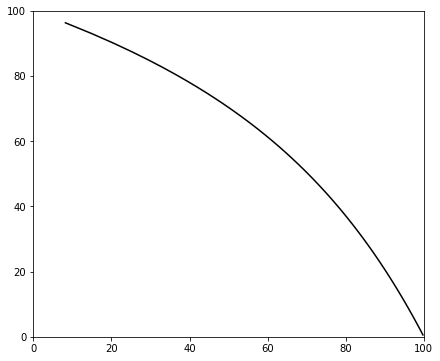

In [6]:
fig, ax = plt.subplots(figsize=(7,6))
ppf(50,alpha =0.8, beta=0.2)

Here is and Edgeworth Box depicting the situation where $L_A = 50$ units of labor are allocated to the agricultural sector and all other allocations are efficient (along the efficiency locus).

(LA,KA)=(50.0, 15.5)  (QA, QM)=(35.2, 72.2)  RTS= 0.1


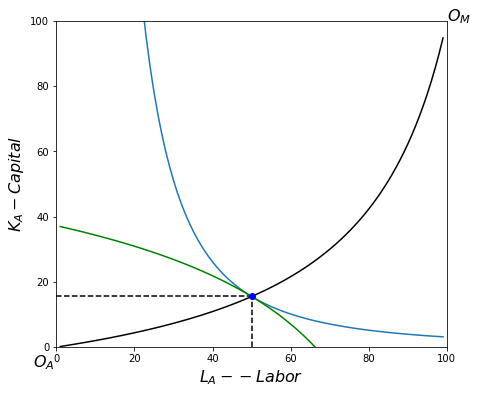

In [7]:
edgeplot(50)

If you're using a jupyter server you can interact with the following plot, changing the technology parameters and initial allocation.

In [8]:
LA = 50
interact(edgeplot, LA=(10, LBAR-10,1), 
         Kbar=fixed(KBAR), Lbar=fixed(LBAR),
         alpha=(0.1,0.9,0.1),beta=(0.1,0.9,0.1))

<function __main__.edgeplot>

## The Hecksher-Ohlin-Samuelson Trade Model

Thus far we've only characterized the locus of possible efficient allocations. In other words, we've traced out the efficiency locus and the production possibility frontier but we haven't  yet determined the how the allocation of factors and outputs across sectors that would be chosen by firms on competitive markets given any particular relative product price ratio $\frac{P_A}{P_M}$.    

Once we've worked out a model to answer this question we have essentially solved for equlibrium in the Hecksher-Ohlin-Samuelson (HOS) trade model.

As previously noted profit maximization in agriculture will lead to  $\frac{(1-\alpha)}{\alpha}\frac{K_A}{L_A} =\frac{w}{r}$ which for our linear homogenous production technology implies a relationship between the optimal production technique or capital-labor intensity $\frac{K_A}{L_A}$ in agriculture and the factor price ratio $\frac{w}{r}$:

$$  \frac{K_A}{L_A} = \frac{\alpha}{1-\alpha} \frac{w}{r} $$

and similarly in manufacturing

$$  \frac{K_M}{L_M} = \frac{\beta}{1-\beta} \frac{w}{r} $$

From the first order conditions we also have:

$$P_A F_L(K_A,L_A) = w = P_M G_L(K_M,L_M) $$

Note that this condition also states that competition drives firms to price at marginal cost in each industry or $P_A = MC_A = w\frac{1}{F_L}$ and $P_M = MC_M = w\frac{1}{G_L}$ which in turn implies that at a market equilibrium optimum 

$$\frac{P_A}{P_M} = \frac{G_L(K_M,L_M)}{F_L(K_A,L_A)}$$

This states that the world price line with slope (negative) $\frac{P_A}{P_M}$ will be tangent to the production possibility frontier which as a slope (negative) $\frac{MC_A}{MC_M}= \frac{P_A}{P_M}$ which can also be written as $\frac{G_L}{F_L}$ or equivalently $\frac{G_K}{F_K}$. In other words the competitive market leads producers to move resources across sectors to maximize the value of GDP at world prices. 

With the Cobb Douglas technology we can write:

$$F_L = (1-\alpha) \left [ \frac{K_A}{L_A} \right]^\alpha$$

$$G_L = (1-\beta) \left [ \frac{K_M}{L_M} \right]^\beta$$

Using these expressions and the earlier expression relating $\frac{K_A}{L_A}$ and $\frac{K_M}{L_M}$ to $\frac{w}{r}$ we have:

$$\frac{P_A}{P_M} 
=\frac{1-\alpha}{1-\beta} 
    \frac{\left [ \frac{ (1-\beta)}{\beta} \frac{w}{r} \right]^\beta} 
    { \left [ \frac{ (1-\alpha)}{\alpha} \frac{w}{r} \right]^\alpha}
$$

or 

$$\frac{P_A}{P_M} = \Gamma \left [ \frac{w}{r}  \right]^{\beta - \alpha}
$$
where

$$\Gamma =
\frac{1-\alpha}{1-\beta} 
\left ( \frac{\alpha}{1-\alpha} \right )^\alpha 
\left ( \frac{1-\beta}{\beta} \right )^\beta 
$$

Or solving for $\frac{w}{r}$ as a function of the world prices we find an expression for the 'Stolper-Samuelson' (SS) line:

$$\frac{w}{r} = \frac{1}{\Gamma} \left [  \frac{P_A}{P_M}   \right ]^\frac{1}{\beta-\alpha} $$

If agriculture is more labor intensive than manufacturing, so $\alpha < \beta$, then an increase in the relative price of agricultural goods will create an incipient excess demand for labor and excess supply of capital and equilibrium will only be restored if the wage-rental ratio falls.  

 This tells us that for each world relative price ratio $\frac{P_A}{P_M}$ we can calculate a corresponding equilibrium wage-rental ratio $\frac{w}{r}$ and this in turn determines optimal capital-intensities in each sector $\frac{K_A}{L_A}$ and $\frac{K_M}{L_M}$ and optimal quantities $L_A, K_A, L_M$ and $K_M$

### To be completed

 * Code to solve for unique HOS equilibrium as a function of world relative price $\frac{P_A}{P_M}$
 * Interactive plot with $\frac{P_A}{P_M}$ slider that plots equilibrium in Edgeworth box and PPF
 